In [1]:
import json

from cuboid_expansion import jetta_expansion, check_r3_spaces, add_reward_hacking
from Cuboids import Cuboids

# CASE 1

In [2]:
cuboids_input = Cuboids()
cuboids_input.read('case_1_input.json')

In [3]:
cuboids_output = jetta_expansion(cuboids_input)
print('Input length: ', len(cuboids_input), ' | input average volume: ', cuboids_input.avg_volume())
print('Output length: ', len(cuboids_output), ' | output average volume: ', cuboids_output.avg_volume())

Input length:  120  | input average volume:  0.2848340231666668
Output length:  119  | output average volume:  0.28722758638655466


In [4]:
check_r3_spaces(cuboids_input, cuboids_output)

100%|██████████████████████████████████████████████████████████████████████████████| 120/120 [00:00<00:00, 4994.26it/s]


Input is inside output space


100%|██████████████████████████████████████████████████████████████████████████████| 119/119 [00:00<00:00, 7437.60it/s]

Output is inside input space


In [5]:
with open('case_1_output.json', 'w') as outfile:
    outfile.write(json.dumps(cuboids_output.tojson()))

In [6]:
print('Input length: ', len(cuboids_input), ' | input average volume: ', cuboids_input.avg_volume())
print('Output length: ', len(cuboids_output), ' | output average volume: ', cuboids_output.avg_volume())
cuboids_output = add_reward_hacking(cuboids_output, 3 * len(cuboids_input))
print('Output hacked length: ', len(cuboids_output), ' | output hacked average volume: ', cuboids_output.avg_volume())
with open('case_1_hacked_output.json', 'w') as outfile:
    outfile.write(json.dumps(cuboids_output.tojson()))

Input length:  120  | input average volume:  0.2848340231666668
Output length:  119  | output average volume:  0.28722758638655466
Output hacked length:  360  | output hacked average volume:  1.365683524938897


# CASE 2

In [7]:
cuboids_input = Cuboids()
cuboids_input.read('case_2_input.json')
cuboids_output = jetta_expansion(cuboids_input)
print('Input length: ', len(cuboids_input), ' | input average volume: ', cuboids_input.avg_volume())
print('Output length: ', len(cuboids_output), ' | output average volume: ', cuboids_output.avg_volume())

Input length:  2000  | input average volume:  2.6382629074339974
Output length:  904  | output average volume:  9.848404225160438


In [8]:
check_r3_spaces(cuboids_input, cuboids_output)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:30<00:00, 66.61it/s]


Input is inside output space


100%|████████████████████████████████████████████████████████████████████████████████| 904/904 [01:26<00:00, 10.50it/s]

Output is inside input space


In [10]:
with open('case_2_output.json', 'w') as outfile:
    outfile.write(json.dumps(cuboids_output.tojson()))

In [11]:
print('Input length: ', len(cuboids_input), ' | input average volume: ', cuboids_input.avg_volume())
print('Output length: ', len(cuboids_output), ' | output average volume: ', cuboids_output.avg_volume())
cuboids_output = add_reward_hacking(cuboids_output, 3 * len(cuboids_input))
print('Output hacked length: ', len(cuboids_output), ' | output hacked average volume: ', cuboids_output.avg_volume())
with open('case_2_hacked_output.json', 'w') as outfile:
    outfile.write(json.dumps(cuboids_output.tojson()))

Input length:  2000  | input average volume:  2.6382629074339974
Output length:  904  | output average volume:  9.848404225160438
Output hacked length:  6000  | output hacked average volume:  45.53634746128756


# MERGE DE CUBOIDES

In [10]:
import collections
from Cuboids import Cuboids
from cuboid_expansion import mergeable_yi, sort_yf
from Rectangle import plot_rectangles
from rectangle_expansion import rect_in_list, add_to_rectangles, rectangles_expansion
x_range = [0, 2.3]
z_range = [0, 12]
cuboids_input = Cuboids()
cuboids_input.read('case_2_input.json')

In [11]:
mergeables = mergeable_yi(cuboids_input)

In [12]:
for mergei in mergeables:
    print('Numero de figuras: ', len(mergei), ' yi: ', mergei.yi_counter())

Numero de figuras:  126  yi:  Counter({0.05397568061384508: 126})
Numero de figuras:  107  yi:  Counter({1.2355001568764923: 107})
Numero de figuras:  117  yi:  Counter({0.8236633628187103: 117})
Numero de figuras:  110  yi:  Counter({1.8462654646833865: 110})
Numero de figuras:  116  yi:  Counter({0.25194985089890937: 116})
Numero de figuras:  110  yi:  Counter({0.3184746095162008: 110})
Numero de figuras:  115  yi:  Counter({1.1585809421240003: 115})
Numero de figuras:  117  yi:  Counter({1.3388370764956576: 117})
Numero de figuras:  127  yi:  Counter({0.5333362978082992: 127})
Numero de figuras:  116  yi:  Counter({1.4170696106454916: 116})


In [13]:
mergei = mergeables[0]
yf_list = sort_yf(mergei)
yf_list

In [18]:
all_rect = []

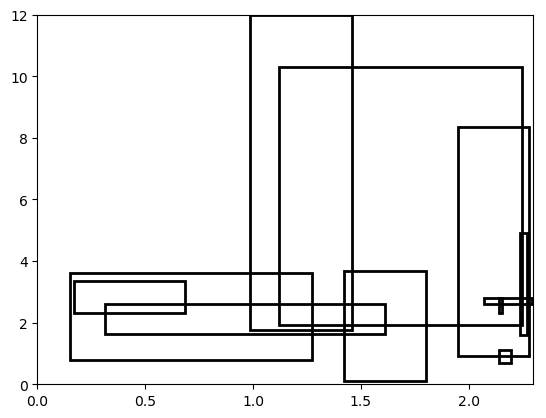

In [38]:
referenceyf = yf_list[10]
rect_input = mergei.rectangles_withyf(referenceyf, 'greater')
plot_rectangles(rect_input, x_range, z_range)

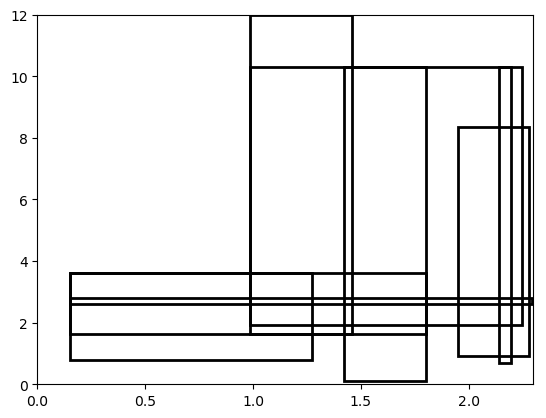

In [39]:
new_rect_list = mergei.rectangles_withyf(referenceyf, 'equal')
for new_rect in new_rect_list:
    if not rect_in_list(new_rect, all_rect):
        all_rect = add_to_rectangles(new_rect, all_rect)
        all_rect = rectangles_expansion(all_rect)
plot_rectangles(all_rect, x_range, z_range)

# EXPANSAO DE RETANGULOS

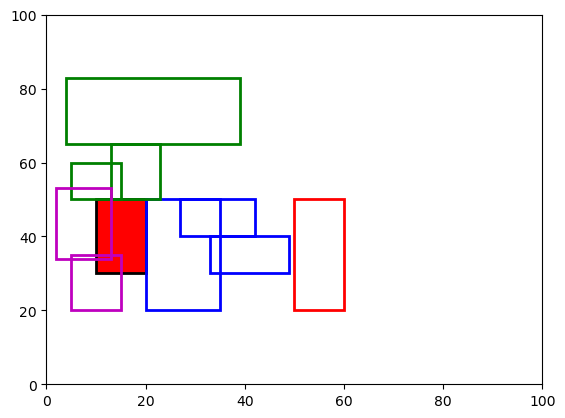

In [100]:
from Rectangle import Rectangle, plot_rectangles
from rectangle_expansion import full_expansions
rect1 = Rectangle(10, 20, 30, 50)
rect1.facecolor = 'r' 

rect2 = Rectangle(20, 35, 20, 50)
rect2.edgecolor = 'b'

rect3 = Rectangle(50, 60, 20, 50)
rect3.edgecolor = 'r'

rect4 = Rectangle(5, 15, 50, 60)
rect4.edgecolor = 'g'

rect5 = Rectangle(5, 15, 20, 35)
rect5.edgecolor = 'm'

rect6 = Rectangle(1, 70, 1, 70)
rect6.edgecolor = 'k'

rect7 = Rectangle(4, 39, 65, 83)
rect7.edgecolor = 'g'

rect8 = Rectangle(13, 23, 50, 65)
rect8.edgecolor = 'g'

rect9 = Rectangle(33, 49, 30, 40)
rect9.edgecolor = 'b'

rect10 = Rectangle(27, 42, 40, 50)
rect10.edgecolor = 'b'

rect11 = Rectangle(2, 13, 34, 53)
rect11.edgecolor = 'm'

rect_all = [rect1, rect2, rect3, rect4, rect5, rect7, rect8, rect9, rect10, rect11]
plot_rectangles(rect_all)

In [101]:
rect_others = list(rect_all)

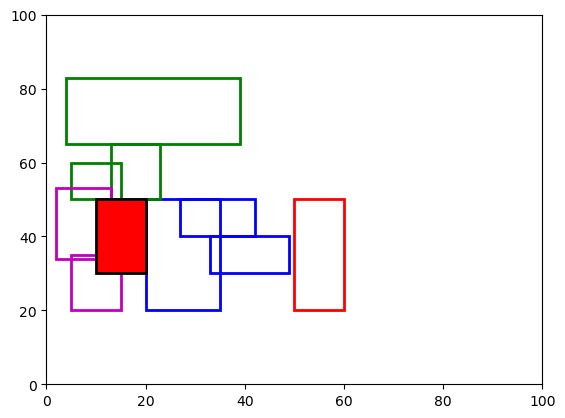

In [68]:
i = 0
recti = rect_others[i].copy()
recti.facecolor = 'r'
del rect_others[i]
plot_rectangles(rect_others + [recti])

In [69]:
next_rects = full_expansions(recti, rect_others)
if len(next_rects) == 0:
    rect_others.insert(i, recti)
    i += 1
else:
    for nr in next_rects:
        rect_others = rect_others[:i] + add_to_rectangles(nr, rect_others[i:])
print('Numero de novos retangulos: ', len(next_rects)) 

Numero de novos retangulos:  2


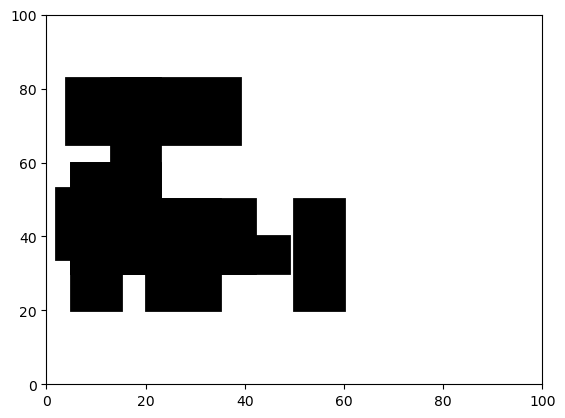

In [99]:
plot_rectangles(rect_others)

In [ ]:
#i = 0
recti = rect_others[i].copy()
recti.facecolor = 'r'
del rect_others[i]
plot_rectangles(rect_others + [recti])
next_rects = full_expansions(recti, rect_others)
if len(next_rects) == 0:
    recti.facecolor = 'k'
    rect_others.insert(i, recti)
    i += 1
else:
    for nr in next_rects:
        rect_others = rect_others[:i] + add_to_rectangles(nr, rect_others[i:])
print('Numero de novos retangulos: ', len(next_rects)) 
plot_rectangles(rect_others)

# PARCIAL

![](parcial.png)

# CALCULO DA COMPLEXIDADE ASSINTOTICA

In [273]:
import tqdm
import random
import json
import matplotlib.pyplot as plt

In [ ]:
def rectangles_expansion(rect_others):

    i = 0
    full_expansions_count = 0
    while(i < len(rect_others)):
        recti = rect_others[i].copy()
        del rect_others[i]
        next_rects = full_expansions(recti, rect_others) # custo computacional
        full_expansions_count += 1
        if len(next_rects) == 0:
            rect_others.insert(i, recti)
            i += 1
        else:
            for nr in next_rects:
                rect_others = rect_others[:i] + add_to_rectangles(nr, rect_others[i:])
    return full_expansions_count


In [148]:
cuboids_input = Cuboids()
cuboids_input.read('case_2_input.json')
all_rect = [cuboid.rect.copy() for cuboid in cuboids_input.cuboids]

In [203]:
operations_by_n = []
n_numbers = []
for N in tqdm.tqdm(range(1, 500, 5)):
    n_operations = 0
    for i in range(10):
        rect_others = list(all_rect)
        rect_others = random.sample(rect_others, N)
        n_operations += rectangles_expansion(rect_others)
    operations_by_n.append(n_operations/10)
    n_numbers.append(N)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [06:57<00:00,  4.17s/it]


In [274]:
#complexity = { 'n_numbers': n_numbers, 'operations': operations_by_n}
#with open('complexity.json', 'w') as outfile:
#    outfile.write(json.dumps(complexity))
complexity = json.load('complexity.json'f)

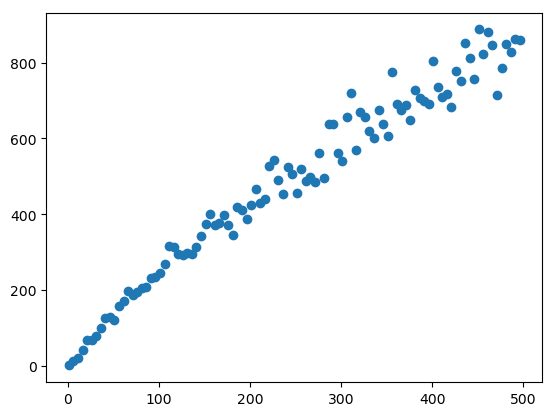

In [275]:
plt.scatter(complexity['n_numbers'], complexity['operations'])
plt.show()

In [269]:
%%time
N = 200
rect_others = list(all_rect)
rect_others = random.sample(rect_others, N)
print(rectangles_expansion(rect_others))

266
Wall time: 84.6 ms


In [270]:
%%time
N = 400
rect_others = list(all_rect)
rect_others = random.sample(rect_others, N)
print(rectangles_expansion(rect_others))

554
Wall time: 314 ms


In [ ]:
# Complixidade proporcional a O(n) para os casos apresentados.